# Color Histograms: Contrast Enhancement through Normalization

In this notebook, we explore **color histograms** and how they can be used for **contrast enhancement** in digital images.  

We will:
1. Load an image.
2. Compute and visualize its **RGB histograms**.
3. Apply **normalization** to enhance contrast.
4. Compare the original and normalized histograms.

## Step 1: Understanding Color Histograms

A **color histogram** represents the distribution of pixel intensities in an image.  
For an RGB image:
- Red channel histogram → intensity distribution of red pixels.
- Green channel histogram → intensity distribution of green pixels.
- Blue channel histogram → intensity distribution of blue pixels.

Let's plot the histograms of each channel.

## Step 2: Contrast Enhancement with Normalization

**Normalization** stretches the pixel intensity values across the full available range (0–255).  
This increases contrast by redistributing pixel values and making details more visible.

We will use OpenCV's `cv2.normalize()` function.

## Step 3: Comparison of Results

- The **original histogram** may be clustered in a narrow intensity range, leading to poor contrast.
- After **normalization**, the histogram is spread across the full intensity range, enhancing contrast.

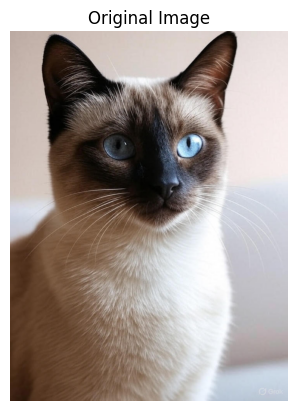

In [2]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("assets/Image.jpeg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV default) to RGB

# Show the original image
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

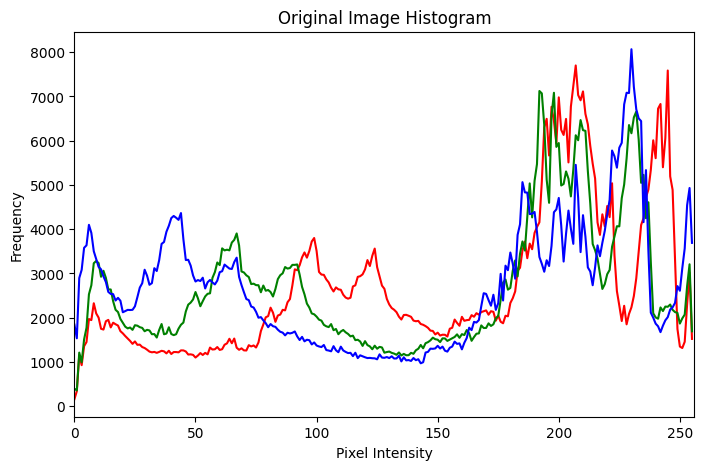

In [3]:
# Function to plot histograms for each color channel
def plot_histogram(image, title="Histogram"):
    color = ('r', 'g', 'b')
    plt.figure(figsize=(8,5))
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0,256])
        plt.plot(hist, color=col)
        plt.xlim([0,256])
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Plot original histograms
plot_histogram(img_rgb, "Original Image Histogram")


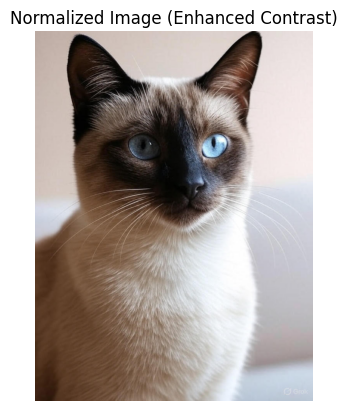

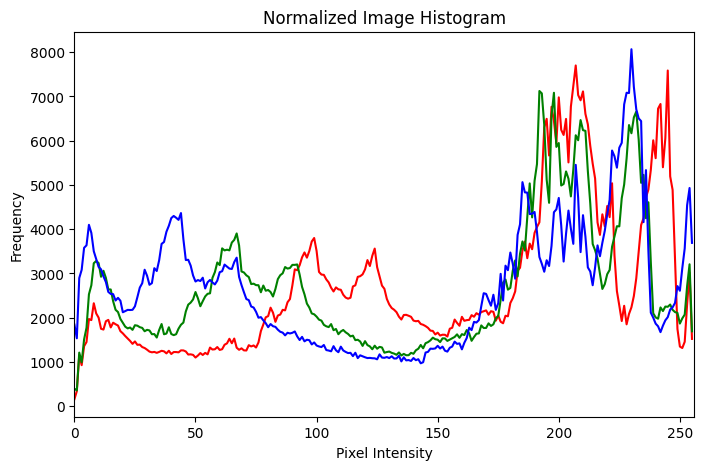

In [4]:
# Normalize the image
normalized_img = np.zeros_like(img_rgb)
normalized_img = cv2.normalize(img_rgb, normalized_img, 0, 255, cv2.NORM_MINMAX)

# Show the normalized image
plt.imshow(normalized_img)
plt.title("Normalized Image (Enhanced Contrast)")
plt.axis("off")
plt.show()

# Plot histogram of normalized image
plot_histogram(normalized_img, "Normalized Image Histogram")


## Conclusion

- **Color histograms** provide a clear way to analyze the intensity distribution of each channel.
- **Normalization** enhances contrast by stretching pixel values to cover the full intensity range.
- This technique is especially useful in image preprocessing for computer vision tasks where visibility and detail are important.

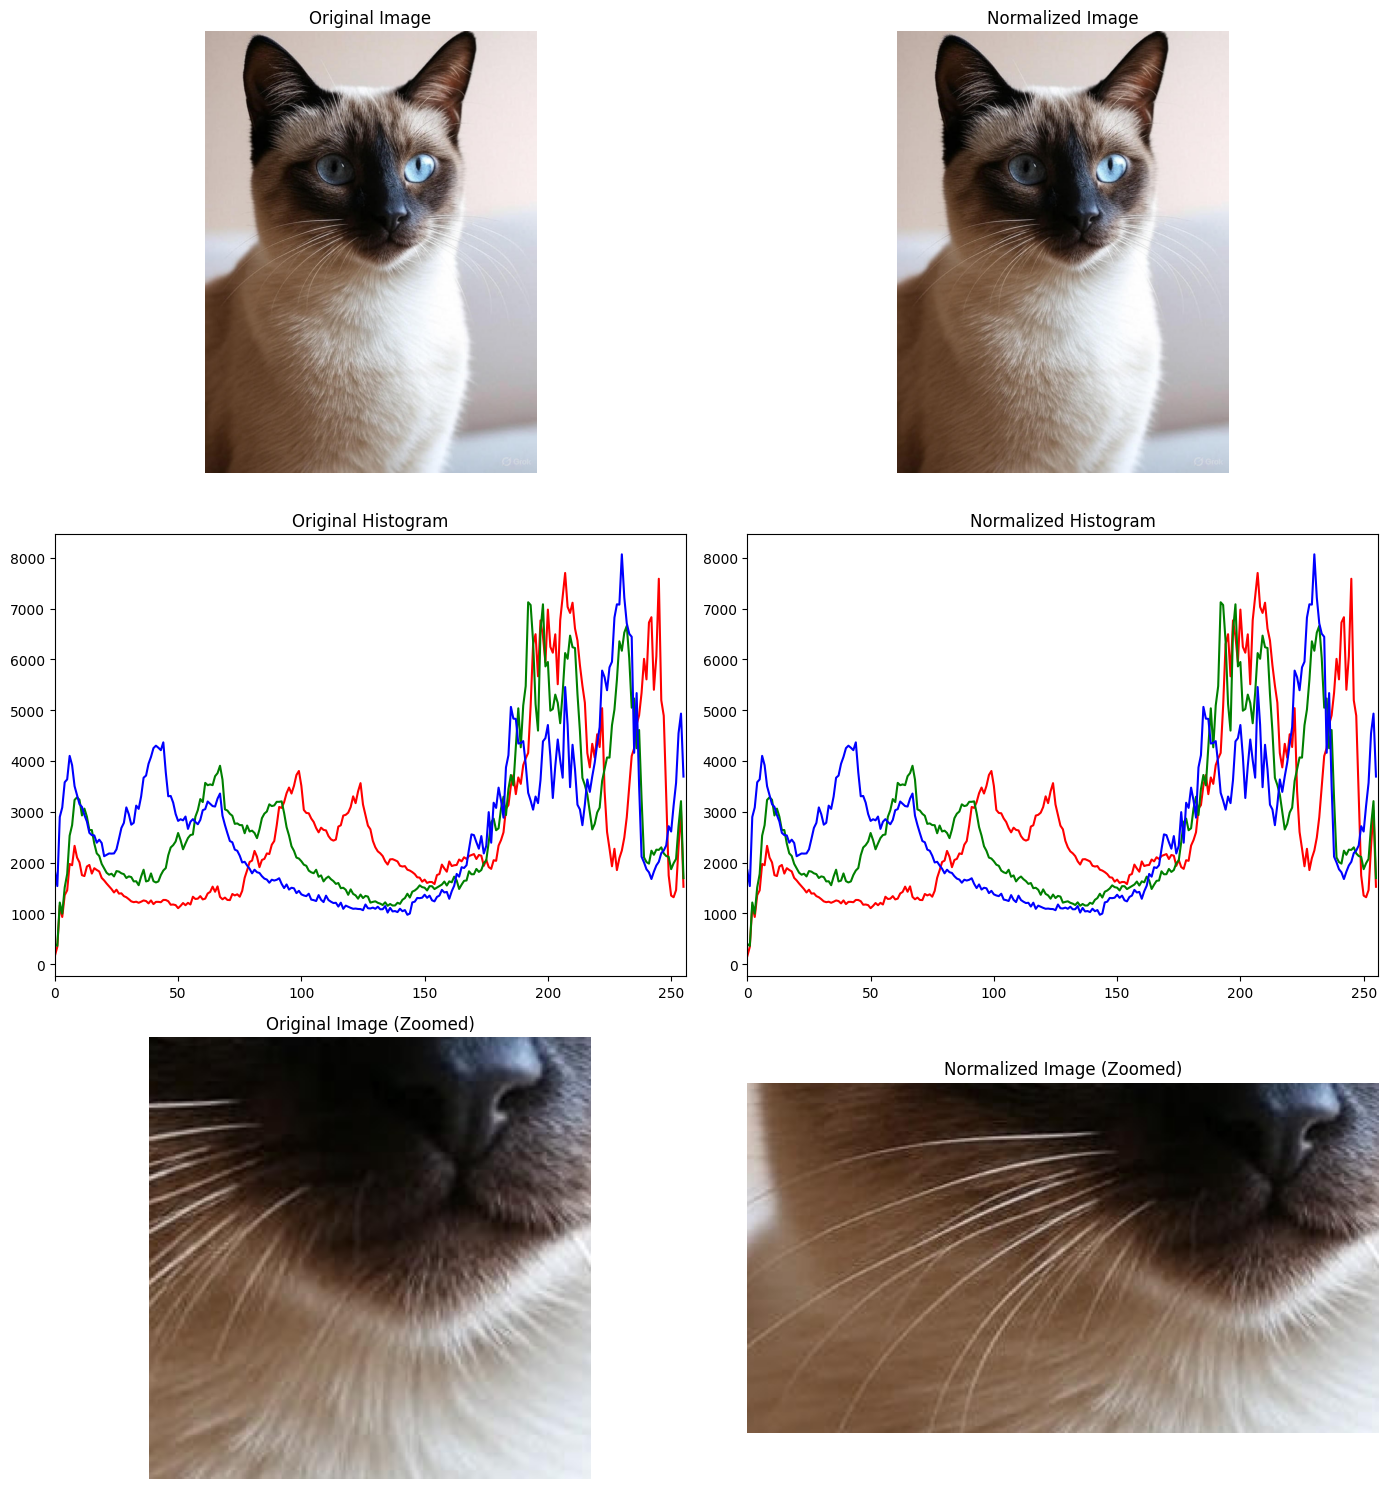

In [5]:
# Combined visualization: Images, Histograms, and Zoomed-in Details

h, w, _ = img_rgb.shape
crop_size = 100  # pixels
center_h, center_w = h//2, w//2

# Crop regions for detail
original_crop = img_rgb[center_h-crop_size:center_h+crop_size,
                        center_w-crop_size:center_w+crop_size]
normalized_crop = normalized_img[center_h-crop_size:center_h+crop_size,
                                 center_w-center_w+crop_size:center_w+crop_size]

# Create figure with 3 rows × 2 columns
fig, axes = plt.subplots(3, 2, figsize=(14,15))

# Row 1: Full images
axes[0,0].imshow(img_rgb)
axes[0,0].set_title("Original Image")
axes[0,0].axis("off")

axes[0,1].imshow(normalized_img)
axes[0,1].set_title("Normalized Image")
axes[0,1].axis("off")

# Row 2: Histograms
color = ('r', 'g', 'b')

for i, col in enumerate(color):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0,256])
    axes[1,0].plot(hist, color=col)
axes[1,0].set_title("Original Histogram")
axes[1,0].set_xlim([0,256])

for i, col in enumerate(color):
    hist = cv2.calcHist([normalized_img], [i], None, [256], [0,256])
    axes[1,1].plot(hist, color=col)
axes[1,1].set_title("Normalized Histogram")
axes[1,1].set_xlim([0,256])

# Row 3: Zoomed details
axes[2,0].imshow(original_crop)
axes[2,0].set_title("Original Image (Zoomed)")
axes[2,0].axis("off")

axes[2,1].imshow(normalized_crop)
axes[2,1].set_title("Normalized Image (Zoomed)")
axes[2,1].axis("off")

plt.tight_layout()
plt.show()